<a href="https://colab.research.google.com/github/darshanvjani/ERA_vision_nlp_ai/blob/main/Introduction%20To%20Pytorch/Introduction_To_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CODE BLOCK: 1

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/ERA/Intro to Pytorch
%pwd

/content/drive/MyDrive/ERA/Intro to Pytorch


'/content/drive/MyDrive/ERA/Intro to Pytorch'

In [3]:
import model
import utils
import train
import torch.nn.functional as F
import torch.optim as optim

CODE BLOCK: 2

In [4]:
utils.check_cuda()

CUDA Available? True


True

CODE BLOCK: 3

CODE BLOCK: 4

In [5]:
dataset = utils.dataset(transformation=True)

CODE BLOCK: 5

In [6]:
batch_size = 512
args = {'batch_size': batch_size, 'shuffle': False, 'num_workers': 2, 'pin_memory': True}

train_loader, test_loader = utils.dataloader(dataset, args)

CODE BLOCK: 6

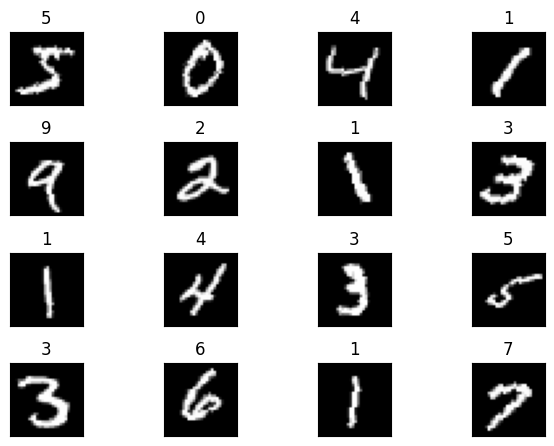

In [7]:
no_of_images = 16
utils.check_images(train_loader, no_of_images)



CODE BLOCK: 7

In [8]:
input_size = ((1, 28, 28))
utils.model_summary(input_size)

CUDA Available? True
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             320
            Conv2d-2           [-1, 64, 24, 24]          18,496
            Conv2d-3          [-1, 128, 10, 10]          73,856
            Conv2d-4            [-1, 256, 8, 8]         295,168
            Linear-5                   [-1, 50]         204,850
            Linear-6                   [-1, 10]             510
Total params: 593,200
Trainable params: 593,200
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.67
Params size (MB): 2.26
Estimated Total Size (MB): 2.94
----------------------------------------------------------------


CODE BLOCK: 8

In [9]:
model_ = model.Net().to('cuda')

optimizer = optim.SGD(model_.parameters(), lr=0.01, momentum=0.9)
criterion = F.nll_loss
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
no_epochs = 1

train.training(model_, train_loader, test_loader, optimizer, criterion, no_epochs, scheduler)


Adjusting learning rate of group 0 to 1.0000e-02.
CUDA Available? True
Epoch 1


Train: Loss=0.5795 Batch_id=117 Accuracy=40.24: 100%|██████████| 118/118 [00:24<00:00,  4.88it/s]


Test set: Average loss: 0.4170, Accuracy: 8728/10000 (87.28%)

Adjusting learning rate of group 0 to 1.0000e-02.


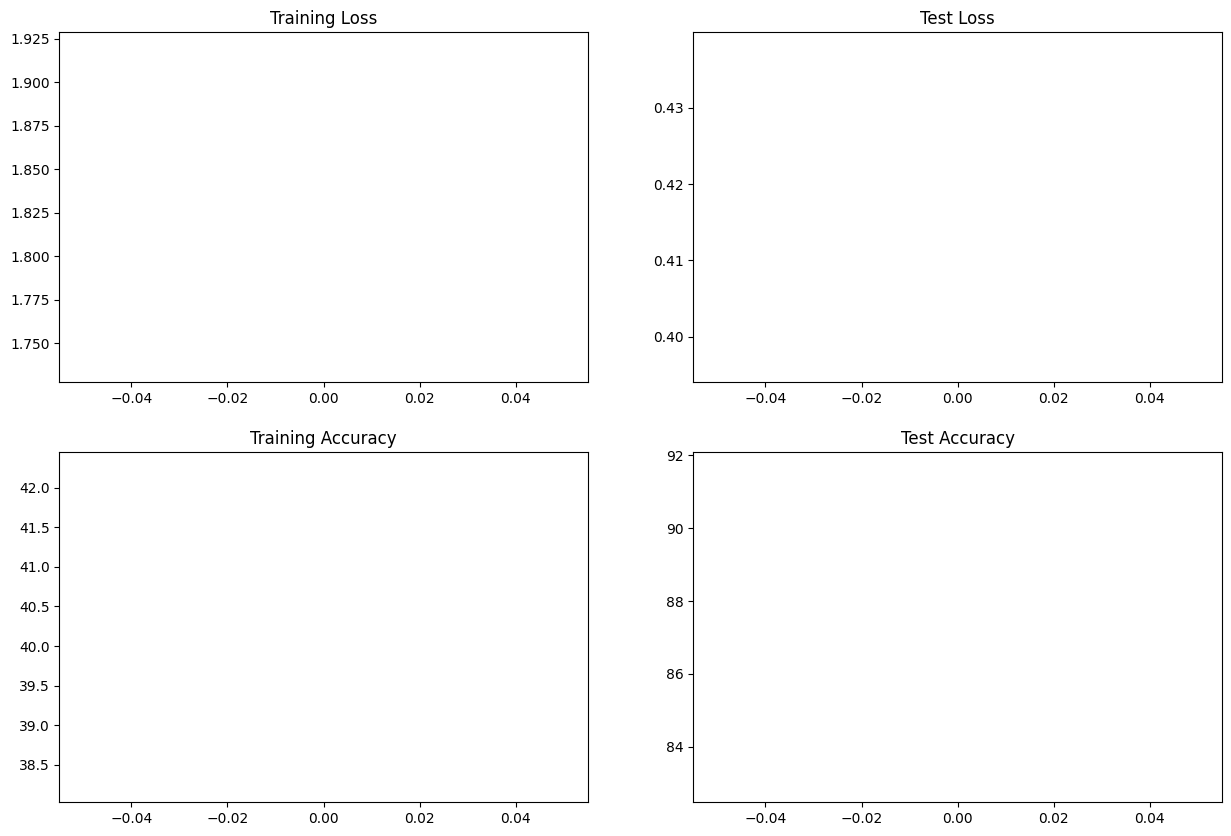

In [10]:
train.training_stats()